In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("../abalone.csv",sep=";")

### Comprencion de los Datos

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   object 
 1   Length    4177 non-null   float64
 2   Diameter  4177 non-null   float64
 3   Height    4177 non-null   float64
 4   Whole     4177 non-null   float64
 5   Shucked   4177 non-null   float64
 6   Viscera   4177 non-null   float64
 7   Shell     4177 non-null   float64
 8   Rings     4177 non-null   int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 277.5+ KB


Como se puede obserbar la data tiene 9 columnas, 8 columnas de variable continua y una columna ccon su variable categorica "Sex", se tiene un total de 4177 filas.

In [4]:
data.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,271.490065,212.430213,74.993057,4400.628202,1960.275078,981.941585,597.896816,9.933684
std,251.479198,198.702603,69.781392,5009.648173,2310.120154,1124.953625,1076.780152,3.224169
min,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,14.000000,658.000000,273.000000,147.000000,35.000000,8.000000
50%,68.000000,55.000000,19.000000,1548.000000,659.000000,345.000000,195.000000,9.000000
75%,525.000000,415.000000,145.000000,7715.000000,3325.000000,1715.000000,405.000000,11.000000
max,815.000000,625.000000,515.000000,28255.000000,13485.000000,6415.000000,7975.000000,29.000000


Se tiene los variables numerias en mm, gramos y enteros. 
se hace un proceso para cambiar estas medicas a metros y a kilogramos

In [5]:
# se cambia el tipo de varialbe de algunas columnas de float a int
data=data.astype({'Length':'int','Diameter':'int','Height':'int','Whole':'int','Shucked':'int',
                  'Viscera':'int','Shell':'int','Rings':'int'})

In [6]:
#convertimos las columnas necesarias de mm a metros y de gramos a kilogramos
data['Length']=data['Length']/1000
data['Diameter']=data['Diameter']/1000
data['Height']=data['Height']/1000

data['Whole']=data['Whole']/10000
data['Shucked']=data['Shucked']/10000
data['Viscera']=data['Viscera']/10000
data['Shell']=data['Shell']/10000

In [18]:
print("Data SET")
print(data.head()) # muestra las primeras 5 filas
print("Descripcion del Data set")
print(data.describe().round(3)) # muestra estadísticas descriptivas básicas

Data SET
  Sex  Length  Diameter  Height   Whole  Shucked  Viscera   Shell  Rings
0   M   0.455     0.365   0.095  0.0514   0.2245   0.0101  0.0015     15
1   M   0.035     0.265   0.009  0.2255   0.0995   0.0485  0.0007      7
2   F   0.053     0.042   0.135  0.0677   0.2565   0.1415  0.0021      9
3   M   0.044     0.365   0.125  0.0516   0.2155   0.0114  0.0155     10
4   I   0.033     0.255   0.008  0.0205   0.0895   0.0395  0.0055      7
Descripcion del Data set
         Length  Diameter    Height     Whole   Shucked   Viscera     Shell  \
count  4177.000  4177.000  4177.000  4177.000  4177.000  4177.000  4177.000   
mean      0.271     0.212     0.075     0.440     0.196     0.098     0.060   
std       0.251     0.199     0.070     0.501     0.231     0.112     0.108   
min       0.002     0.001     0.000     0.000     0.000     0.000     0.000   
25%       0.052     0.039     0.014     0.066     0.027     0.015     0.004   
50%       0.068     0.055     0.019     0.155     0.06

### Correlacion entre variables

In [8]:
data.corr()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
Length,1.000000,0.035983,0.061363,0.091839,0.113756,0.111057,0.078599,0.114894
Diameter,0.035983,1.000000,0.074609,0.137000,0.156661,0.137739,0.062911,0.181456
Height,0.061363,0.074609,1.000000,0.121315,0.160447,0.173241,0.088660,0.223950
Whole,0.091839,0.137000,0.121315,1.000000,0.264060,0.221817,0.173351,0.251008
Shucked,0.113756,0.156661,0.160447,0.264060,1.000000,0.278559,0.217468,0.225632
Viscera,0.111057,0.137739,0.173241,0.221817,0.278559,1.000000,0.201557,0.256909
Shell,0.078599,0.062911,0.088660,0.173351,0.217468,0.201557,1.000000,0.041436
Rings,0.114894,0.181456,0.223950,0.251008,0.225632,0.256909,0.041436,1.000000


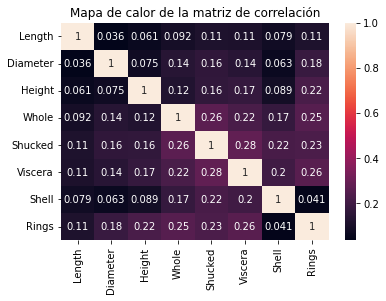

In [9]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Para interpretar los resultados de corr, debes prestar atención a los valores de la matriz de correlación:

* Si un valor es cercano a 1, significa que hay una correlación positiva fuerte entre las dos variables. Esto significa que si una variable aumenta, la otra variable también tiende a aumentar.
* Si un valor es cercano a -1, significa que hay una correlación negativa fuerte entre las dos variables. Esto significa que   si una variable aumenta, la otra variable tiende a disminuir.
* Si un valor es cercano a 0, significa que no hay una correlación lineal fuerte entre las dos variables.

### Visualizacion

#### Graficas por pares

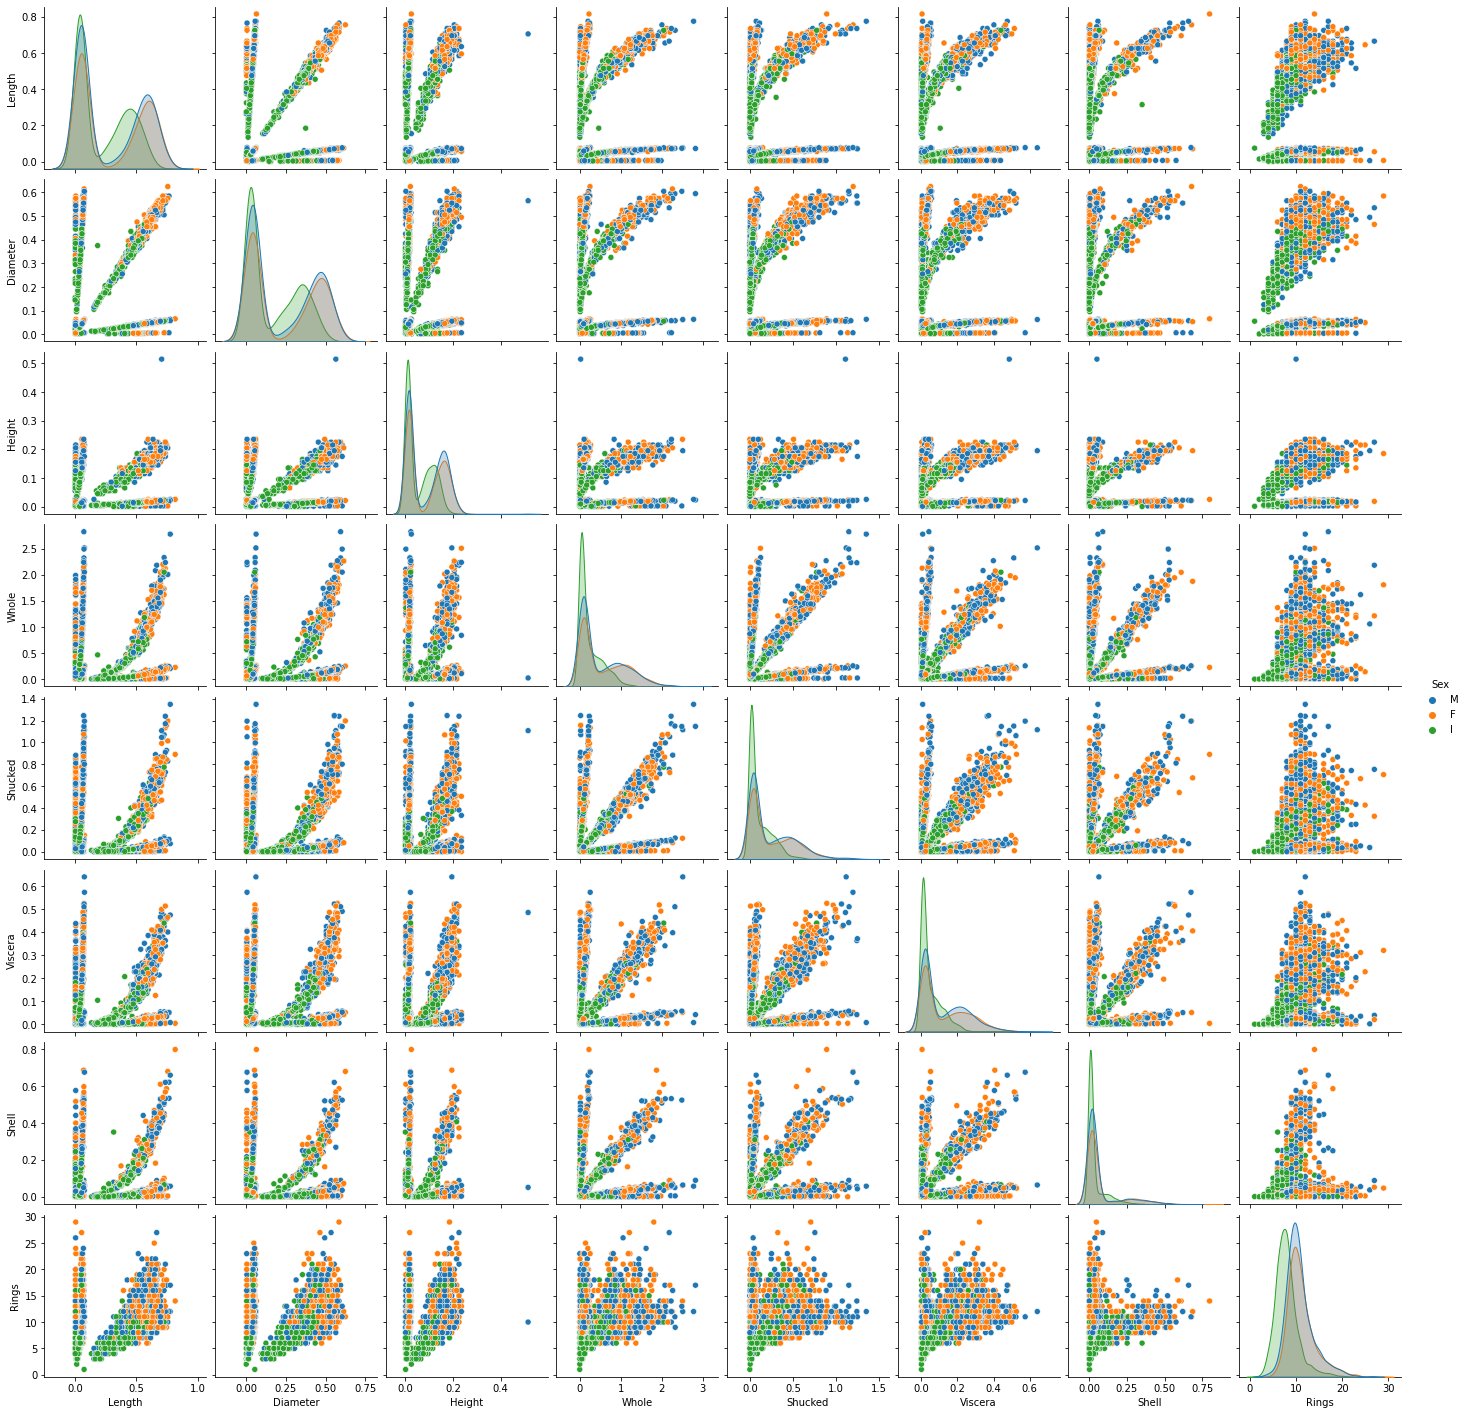

In [27]:
sns.pairplot(data, hue = "Sex")

#### Sex

<AxesSubplot: xlabel='Sex'>

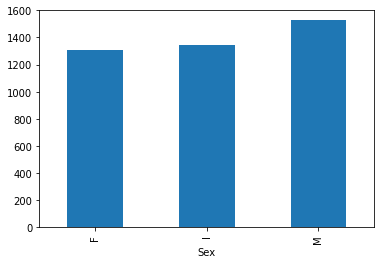

In [10]:
sex=data.groupby('Sex').count()['Rings']
sex.plot(kind='bar')

In [20]:
sex/len(data)

Sex
F    0.312904
I    0.321283
M    0.365813
Name: Rings, dtype: float64

Como se puede observar por la grafica de barras la poblacion de abalones esta distribuida casi de igual proporcion ya que:

Masculino("M") es de un 36.6%

Femenino("F") un 31.3%

Infantes("I") un 32.1%

#### Rings

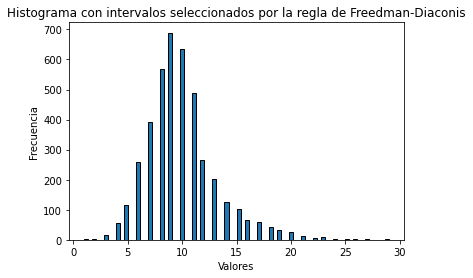

In [12]:
# Calcular los intervalos según la regla de Freedman-Diaconis
iqr = np.percentile(data['Rings'], 75) - np.percentile(data['Rings'], 25)
bins = int(np.ceil((max(data['Rings']) - min(data['Rings'])) / (2 * iqr / (len(data['Rings'])**(1/3)))))

# Crear el histograma con los intervalos seleccionados
plt.hist(data['Rings'], bins=bins, edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma con intervalos seleccionados por la regla de Freedman-Diaconis')

# Mostrar el histograma
plt.show()

podemos observar que las edades mas frecuentes en la poblacion de abalones esta entre 7 y 12 años

In [14]:
bins

76

#### Length

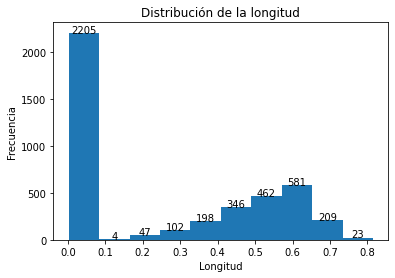

In [37]:
# Histograma de una columna
n, bins, patches =plt.hist(data['Length'], bins=10)
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 0.05, int(n[i]), ha='center')

plt.title('Distribución de la longitud')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

Como se pude abservar que mas de la mitad "2205" abalones tiene una longitud entre 0 y 0.8

#### Mas graficas para corroborar 

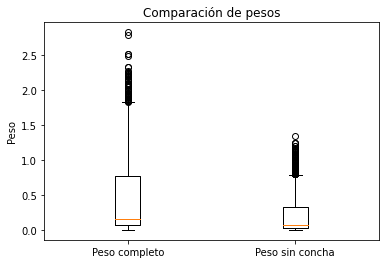

In [24]:
# Diagrama de caja de dos columnas
plt.boxplot([data['Whole'], data['Shucked']])
plt.title('Comparación de pesos')
plt.xticks([1, 2], ['Peso completo', 'Peso sin concha'])
plt.ylabel('Peso')
plt.show()


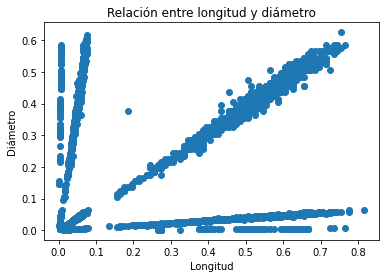

In [25]:
# Diagrama de dispersión de dos columnas
plt.scatter(data['Length'], data['Diameter'])
plt.title('Relación entre longitud y diámetro')
plt.xlabel('Longitud')
plt.ylabel('Diámetro')
plt.show()

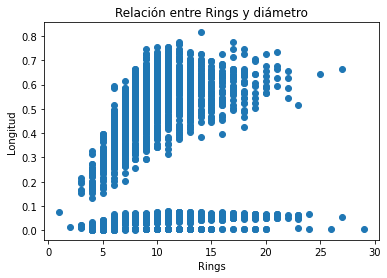

In [30]:
# Diagrama de dispersión de dos columnas
plt.scatter(data['Rings'], data['Length'])
plt.title('Relación entre Rings y diámetro')
plt.xlabel('Rings')
plt.ylabel('Longitud')
plt.show()